In [5]:
import pandas as pd
df=pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [6]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [7]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [8]:
duplicates = df.duplicated().sum()
print(f"Duplicate records found: {duplicates}")

Duplicate records found: 0


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
print(df.describe())

       release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000


In [11]:
print(df.describe(include='object'))

       show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   

              country       date_added rating  duration      listed_in  \
count            7280             7777   7780      7787           7787   
unique            681             1565     14       216            492   
top     United States  January 1, 2020  TV-MA  1 Season  Documentaries   
freq             2555              118   2863      1608            334   

                                              description  
count                                                7787  
unique                                               7769  
top     Multiple women report their husbands as missin...  
freq         

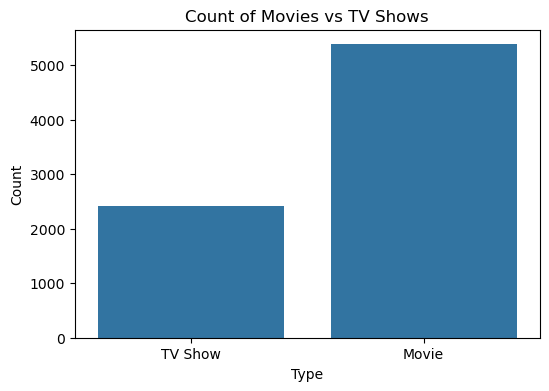

In [12]:
#Type of Content (Movies vs TV Shows)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type') 
plt.title('Count of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


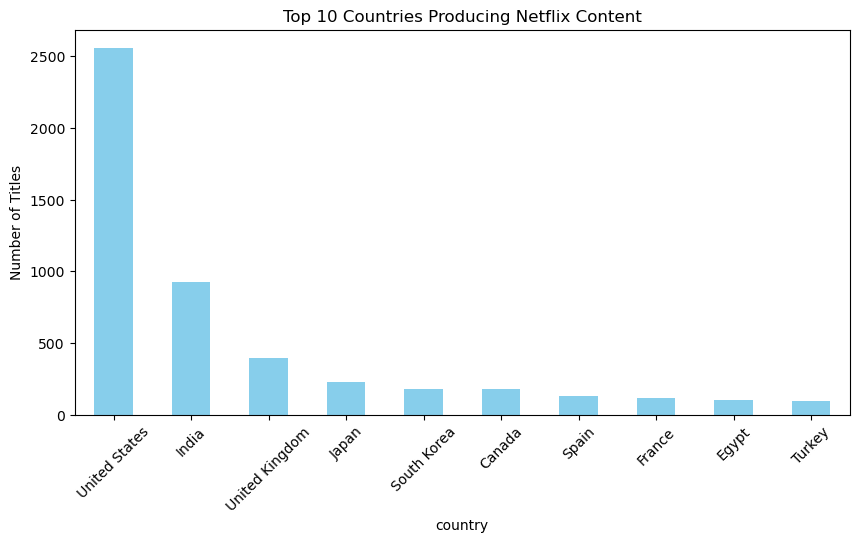

In [13]:
#Top Countries Producing Content

plt.figure(figsize=(10, 5))
df['country'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries Producing Netflix Content')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


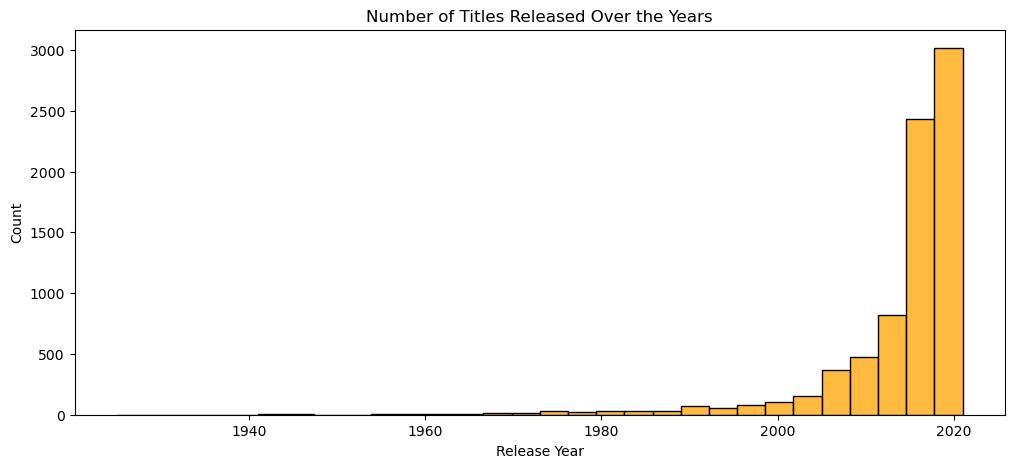

In [14]:
#Content Release Over Years

plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='release_year', bins=30, kde=False, color='orange')
plt.title('Number of Titles Released Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


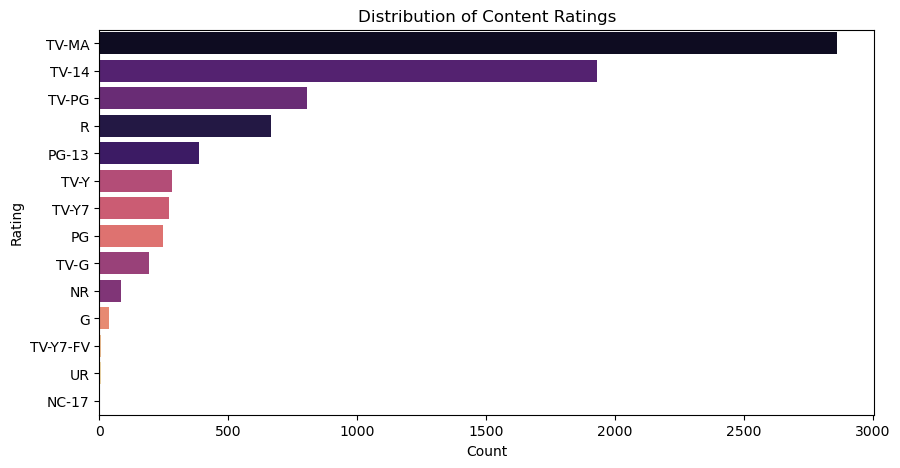

In [15]:
#Content Ratings Distribution

plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, hue='rating', legend=False, palette='magma')
plt.title('Distribution of Content Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()



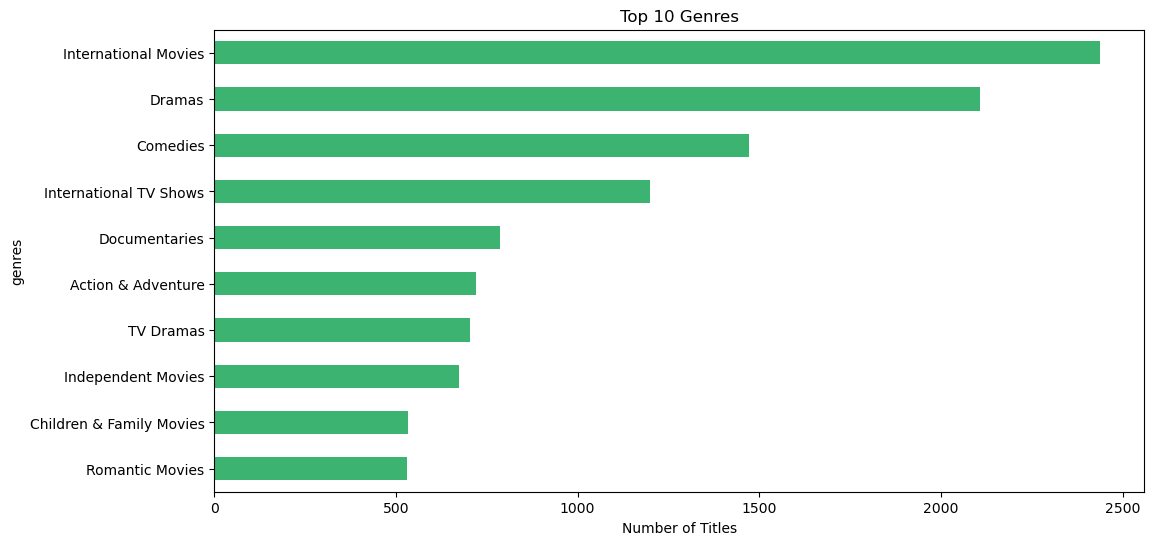

In [16]:
#Top Genres

# Split and explode genres
df['genres'] = df['listed_in'].str.split(', ')
genres = df.explode('genres')

plt.figure(figsize=(12, 6))
genres['genres'].value_counts().head(10).plot(kind='barh', color='mediumseagreen')
plt.title('Top 10 Genres')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.show()


In [17]:
#Handle Missing Values

df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

df = df.dropna(subset=['rating', 'release_year', 'duration', 'listed_in'])



In [18]:
#Convert Categorical Data into Numerical Format

df_encoded = pd.get_dummies(df[['type', 'rating']], drop_first=True)


In [19]:
#Process duration and release_year

import pandas as pd

df=pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

df['duration_mins'] = df['duration'].str.extract(r'(\d+)').astype(float)

df[['duration', 'duration_mins']].head()



,duration,duration_mins
0,4 Seasons,4.0
1,93 min,93.0
2,78 min,78.0
3,80 min,80.0
4,123 min,123.0


In [20]:
df['content_age'] = 2025 - df['release_year']


In [21]:
from sklearn.preprocessing import StandardScaler

numerical_features = df[['duration_mins', 'release_year', 'content_age']]
scaler = StandardScaler()
scaled_numerical = pd.DataFrame(scaler.fit_transform(numerical_features), columns=numerical_features.columns)




In [22]:
#TF-IDF Vectorization on listed_in (Genres)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['listed_in'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())


In [23]:
#Combine All Features into One Final Dataset

final_df = pd.concat([df_encoded.reset_index(drop=True),
                      scaled_numerical.reset_index(drop=True),
                      tfidf_df.reset_index(drop=True)], axis=1)

print("Final shape for clustering:", final_df.shape)
final_df.head()


Final shape for clustering: (7787, 61)


,type_TV Show,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,...,series,shows,spanish,spirituality,sports,stand,talk,teen,thrillers,tv
0,True,False,False,False,False,False,False,False,True,False,...,0.0,0.242849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.625086
1,False,False,False,False,False,False,False,False,True,False,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,False,False,False,False,False,True,False,False,False,False,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,False,False,False,False,True,False,False,False,False,False,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,False,False,False,False,True,False,False,False,False,False,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [24]:
# Create content_age Feature

df['content_age'] = 2025 - df['release_year']


In [25]:
# Create genre_count Feature

df['genre_count'] = df['listed_in'].apply(lambda x: len(str(x).split(',')))


In [26]:
# Transform Categorical Variables

df_encoded = pd.get_dummies(df[['type', 'rating']], drop_first=True)


In [27]:
# Combine All Features for Clustering

from sklearn.preprocessing import StandardScaler

df_encoded = pd.get_dummies(df[['type', 'rating']], drop_first=True)


In [28]:
numerical_features = df[['duration_mins', 'release_year', 'content_age', 'genre_count']]
scaler = StandardScaler()
scaled_numerical = pd.DataFrame(scaler.fit_transform(numerical_features), columns=numerical_features.columns)


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['listed_in'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())


In [30]:
final_data = pd.concat([df_encoded.reset_index(drop=True),
                        scaled_numerical.reset_index(drop=True),
                        tfidf_df.reset_index(drop=True)], axis=1)

print("Final shape for clustering:", final_data.shape)

Final shape for clustering: (7787, 62)


In [31]:
# K-Means Clustering

# Elbow Method

from sklearn.cluster import KMeans

inertia = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(final_data)
    inertia.append(km.inertia_)

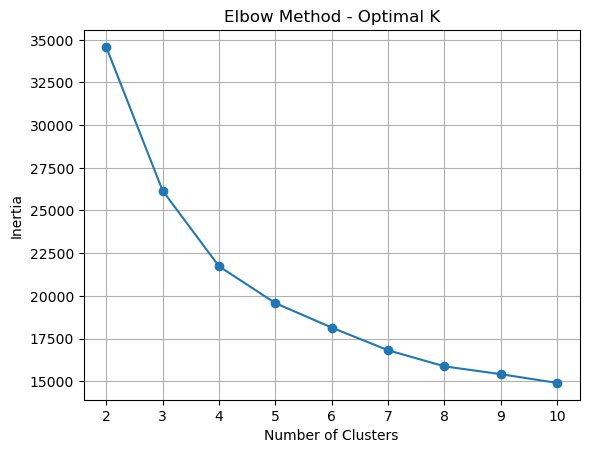

In [32]:
import matplotlib.pyplot as plt

plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method - Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()

In [33]:
# KMeans Clustering with Optimal K

optimal_k = 5 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(final_data)


In [34]:
# Silhouette Score

from sklearn.metrics import silhouette_score

silhouette_kmeans = silhouette_score(final_data, df['kmeans_cluster'])
print("K-Means Silhouette Score:", silhouette_kmeans)


K-Means Silhouette Score: 0.27091622861048875


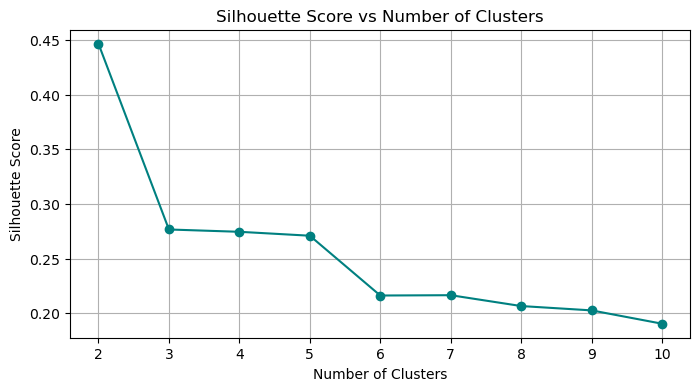

In [35]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(final_data)
    silhouette_avg = silhouette_score(final_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='teal')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [36]:
# Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
df['hierarchical_cluster'] = hierarchical.fit_predict(final_data)


In [37]:
silhouette_hier = silhouette_score(final_data, df['hierarchical_cluster'])
print("Hierarchical Clustering Silhouette Score:", silhouette_hier)

Hierarchical Clustering Silhouette Score: 0.22771078158970093


In [39]:
# DBSCAN

from sklearn.cluster import DBSCAN

df = df.reset_index(drop=True)
final_data = final_data.reset_index(drop=True)



In [40]:
dbscan = DBSCAN(eps=1.5, min_samples=10)
df['dbscan_cluster'] = dbscan.fit_predict(final_data)

In [41]:
mask = df['dbscan_cluster'] != -1


In [42]:
from sklearn.metrics import silhouette_score

silhouette_dbscan = silhouette_score(final_data[mask], df.loc[mask, 'dbscan_cluster'])
print("DBSCAN Silhouette Score (excluding noise):", silhouette_dbscan)

DBSCAN Silhouette Score (excluding noise): 0.7337147159367859


In [48]:
# Finalize Models with Optimized Parameters

# K-Means Clustering (with optimal k)

from sklearn.cluster import KMeans

optimal_k = 5  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(final_data)


In [50]:
# DBSCAN (tune eps and min_samples)

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=10)
df['dbscan_cluster'] = dbscan.fit_predict(final_data)


In [52]:
# Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=5, linkage='ward')  
df['hierarchical_cluster'] = model.fit_predict(final_data)



In [53]:
from sklearn.metrics import silhouette_score

score = silhouette_score(final_data, df['hierarchical_cluster'])
print("Hierarchical Clustering Silhouette Score:", score)


Hierarchical Clustering Silhouette Score: 0.22771078158970093


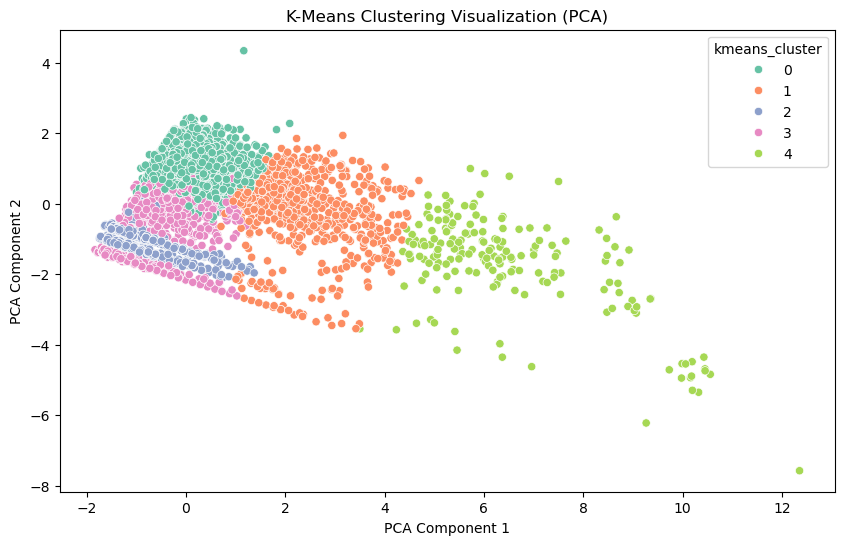

In [54]:
# Dimensionality Reduction & Visualization

#  PCA (2D Scatter Plot)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
pca_data = pca.fit_transform(final_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['kmeans_cluster'], palette='Set2')
plt.title("K-Means Clustering Visualization (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


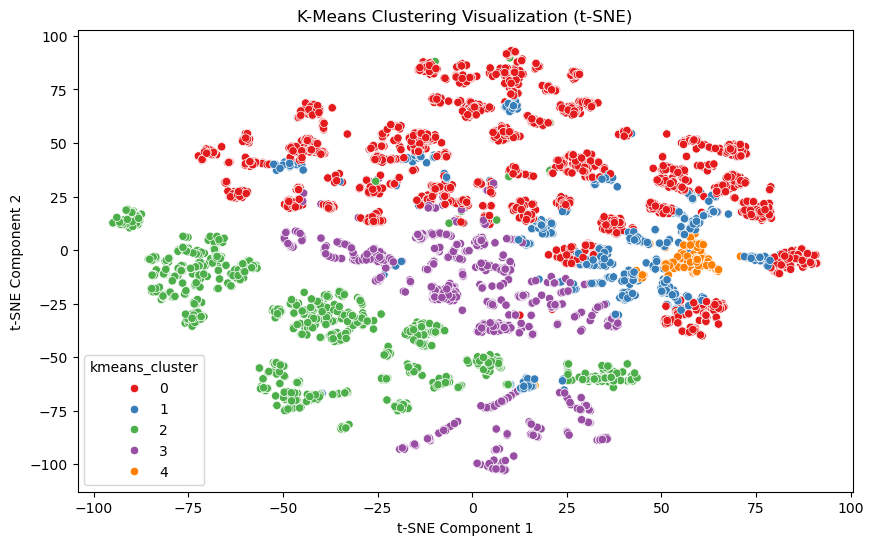

In [55]:
# t-SNE (for non-linear projection)

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42)
tsne_data = tsne.fit_transform(final_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=df['kmeans_cluster'], palette='Set1')
plt.title("K-Means Clustering Visualization (t-SNE)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


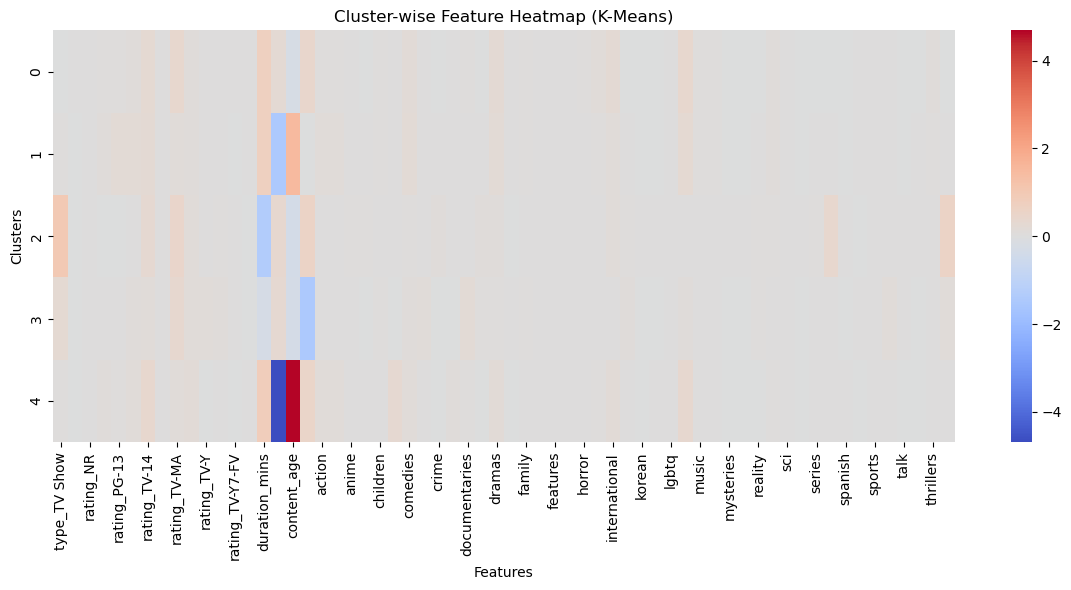

In [56]:
# Heatmap: Feature Correlation with Clusters

clustered_data = final_data.copy()
clustered_data['kmeans_cluster'] = df['kmeans_cluster']

cluster_means = clustered_data.groupby('kmeans_cluster').mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, cmap='coolwarm')
plt.title("Cluster-wise Feature Heatmap (K-Means)")
plt.xlabel("Features")
plt.ylabel("Clusters")
plt.tight_layout()
plt.show()


In [92]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df['Kmeans_cluster'] = kmeans.fit_predict(X_scaled) 


In [98]:

df['genres'] = df['listed_in'].str.split(', ')
genres_exploded = df.explode('genres')


top_genres = genres_exploded.groupby(['Kmeans_cluster', 'genres']).size().reset_index(name='count')
top_genres = top_genres.sort_values(['Kmeans_cluster', 'count'], ascending=[True, False])

for cluster in top_genres['Kmeans_cluster'].unique():
    print(f"\n Cluster {cluster} - Top Genres")
    display(top_genres[top_genres['Kmeans_cluster'] == cluster].head(5))



 Cluster 0 - Top Genres


,Kmeans_cluster,genres,count
11,0,International Movies,2061
7,0,Dramas,1630
4,0,Comedies,1043
10,0,Independent Movies,608
0,0,Action & Adventure,432



 Cluster 1 - Top Genres


,Kmeans_cluster,genres,count
31,1,Dramas,292
26,1,Comedies,277
35,1,International Movies,264
19,1,Action & Adventure,163
42,1,Romantic Movies,89



 Cluster 2 - Top Genres


,Kmeans_cluster,genres,count
67,2,International TV Shows,1188
81,2,TV Dramas,668
80,2,TV Comedies,447
61,2,Crime TV Shows,425
73,2,Romantic TV Shows,333



 Cluster 3 - Top Genres


,Kmeans_cluster,genres,count
93,3,Documentaries,360
109,3,Stand-Up Comedy,304
101,3,Kids' TV,194
91,3,Children & Family Movies,187
92,3,Comedies,101



 Cluster 4 - Top Genres


,Kmeans_cluster,genres,count
126,4,Dramas,85
129,4,International Movies,84
122,4,Classic Movies,81
116,4,Action & Adventure,50
123,4,Comedies,47


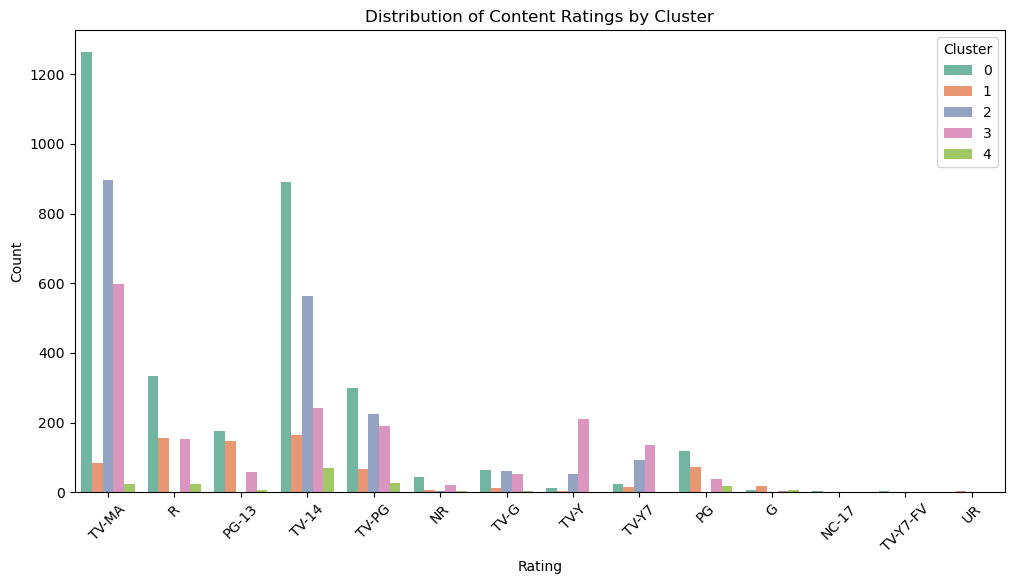

In [58]:
# Distribution of Ratings per Cluster

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', hue='kmeans_cluster', palette='Set2')
plt.title("Distribution of Content Ratings by Cluster")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.legend(title="Cluster")
plt.xticks(rotation=45)
plt.show()


In [59]:
#  K-Means Evaluation

from sklearn.metrics import silhouette_score, davies_bouldin_score

sil_kmeans = silhouette_score(final_data, df['kmeans_cluster'])

db_kmeans = davies_bouldin_score(final_data, df['kmeans_cluster'])


In [60]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_model.fit(final_data)
inertia = kmeans_model.inertia_

print("K-Means Evaluation Metrics:")
print("Silhouette Score:", sil_kmeans)
print("Davies-Bouldin Index:", db_kmeans)
print("Inertia:", inertia)

K-Means Evaluation Metrics:
Silhouette Score: 0.27091622861048875
Davies-Bouldin Index: 1.2538775705530805
Inertia: 19575.815565501864


In [61]:
# Hierarchical Clustering Evaluation

from sklearn.cluster import AgglomerativeClustering

hier_model = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['hierarchical_cluster'] = hier_model.fit_predict(final_data)

sil_hier = silhouette_score(final_data, df['hierarchical_cluster'])
db_hier = davies_bouldin_score(final_data, df['hierarchical_cluster'])

print("\nHierarchical Clustering Evaluation:")
print("Silhouette Score:", sil_hier)
print("Davies-Bouldin Index:", db_hier)



Hierarchical Clustering Evaluation:
Silhouette Score: 0.22771078158970093
Davies-Bouldin Index: 1.4715643865735935


In [62]:
# DBSCAN Evaluation

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=10)
df['dbscan_cluster'] = dbscan.fit_predict(final_data)

mask = df['dbscan_cluster'] != -1  # Filter out noise

if mask.sum() > 0:
    sil_dbscan = silhouette_score(final_data[mask], df['dbscan_cluster'][mask])
    db_dbscan = davies_bouldin_score(final_data[mask], df['dbscan_cluster'][mask])

    print("\nDBSCAN Evaluation (excluding noise):")
    print("Silhouette Score:", sil_dbscan)
    print("Davies-Bouldin Index:", db_dbscan)
else:
    print("DBSCAN identified too much noise — no clusters to evaluate.")



DBSCAN Evaluation (excluding noise):
Silhouette Score: 0.7337147159367859
Davies-Bouldin Index: 0.26033644280189294


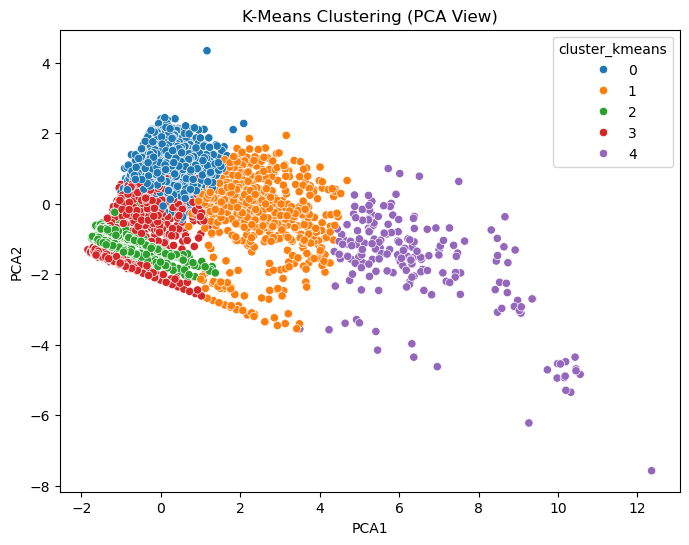

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_final = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

df_final['cluster_kmeans'] = kmeans.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_final, x='PCA1', y='PCA2', hue='cluster_kmeans', palette='tab10')
plt.title("K-Means Clustering (PCA View)")
plt.show()

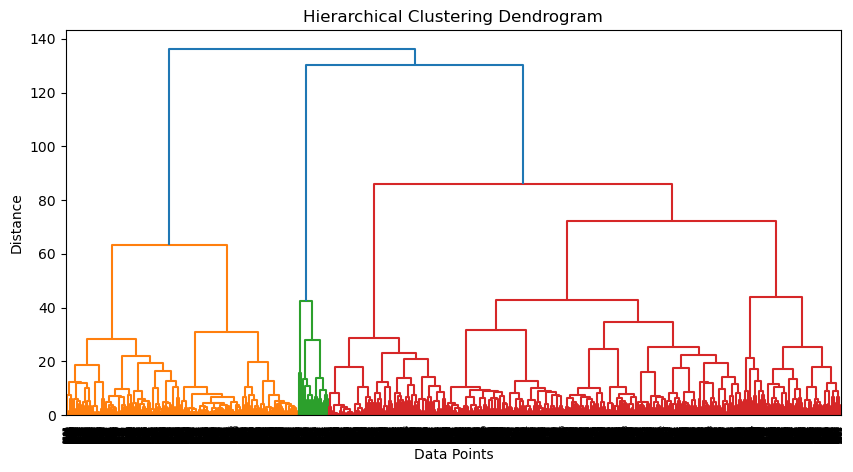

In [64]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


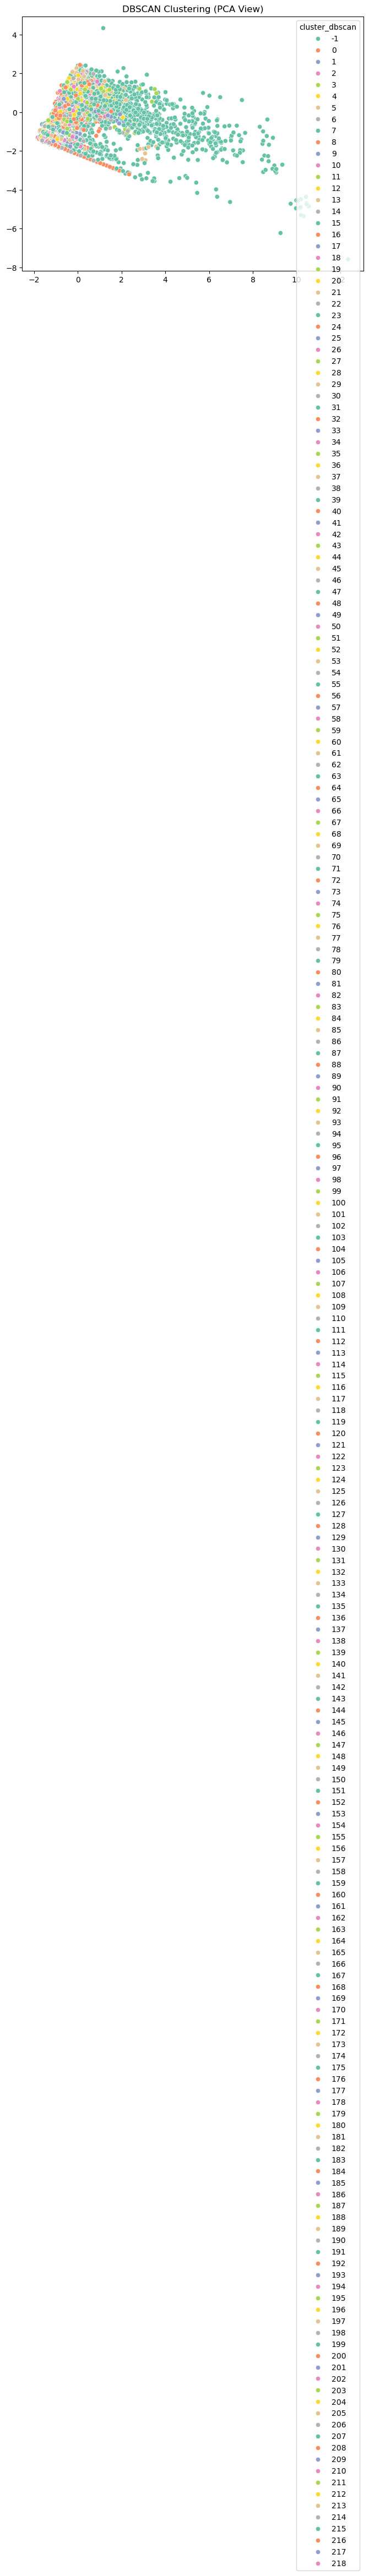

In [65]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
df_final['cluster_dbscan'] = dbscan_labels

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_final['cluster_dbscan'], palette='Set2')
plt.title("DBSCAN Clustering (PCA View)")
plt.show()